In [1]:
#Libraries used for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtic
from sklearn import metrics
#Libraries used for Decision Tree and Random Forest 
#Imlearn used for upscaling of Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
#Libraries used to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# DATA PREPROCESSING


In [2]:
#Reading the Teclo Customer Churn csv file
tel =  pd.read_csv("Teclo.csv")

### Understanding the data

In [3]:
tel.shape

(7043, 21)

In [4]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
tel.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
(tel['Churn'].value_counts()/len(tel['Churn']))*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

#### Given data set consists of 73.4% of customers who arent churned 
#### 26.5% are churned customers

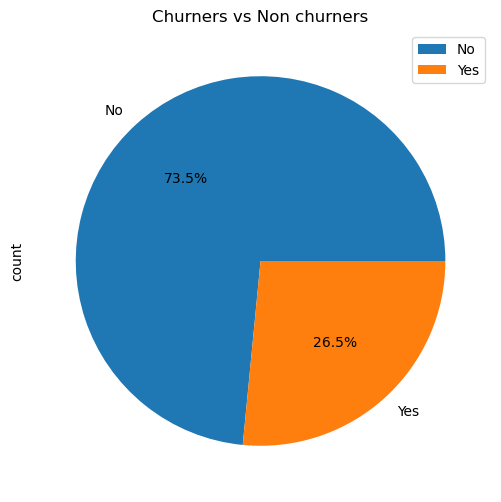

In [8]:
#Pie Chart for churned vs non churned customers
tel['Churn'].value_counts().plot(kind = 'pie',figsize=(8,6),autopct = "%1.1f%%",legend = True,title = 'Churners vs Non churners')
plt.show()

In [9]:
#Examing the data for null values
tel['TotalCharges'] = pd.to_numeric(tel.TotalCharges,errors = 'coerce')
tel.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
tel.loc[tel['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


As the percentage of the missing value is low, we dont process them we can directly ignore or remove them 

In [11]:
tel.dropna(how = 'any',inplace = True)
#tel.fillna(0)

In [12]:
print(tel['tenure'].max())


72


In [13]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Divide customers into bins(range) based on tenure 
#### e.g. for tenure < 12 months: assign a tenure group if 1-12

In [14]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
tel['tenure_group'] = pd.cut(tel.tenure,range(1,80,12),right = False,labels = labels)

In [15]:
tel['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [16]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [17]:
#Drop the not required colums for model , like tenure and customer id  
tel.drop(columns = ['customerID','tenure'],axis = 1,inplace = True)
tel.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Exploratory Data Analysis 

## 1.Univariable analysis on the Churn outcome

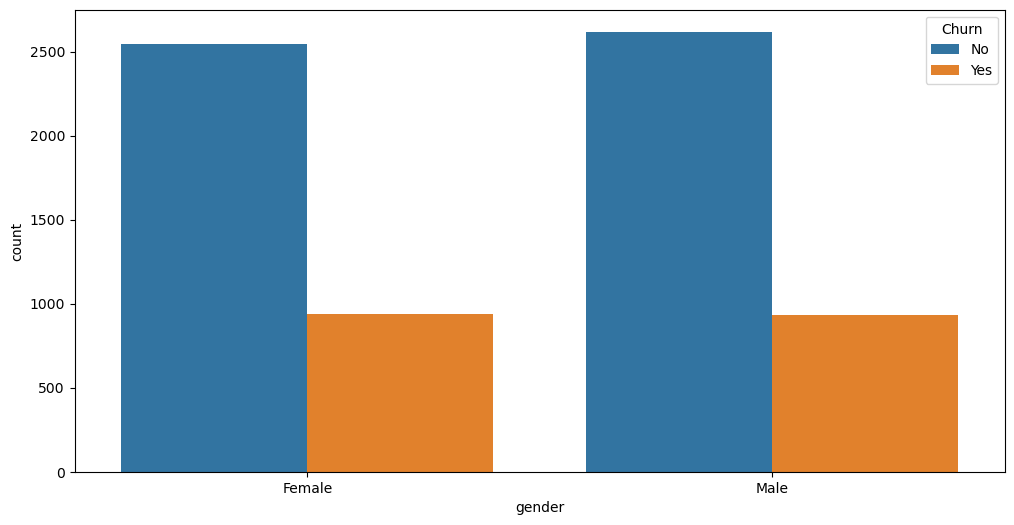

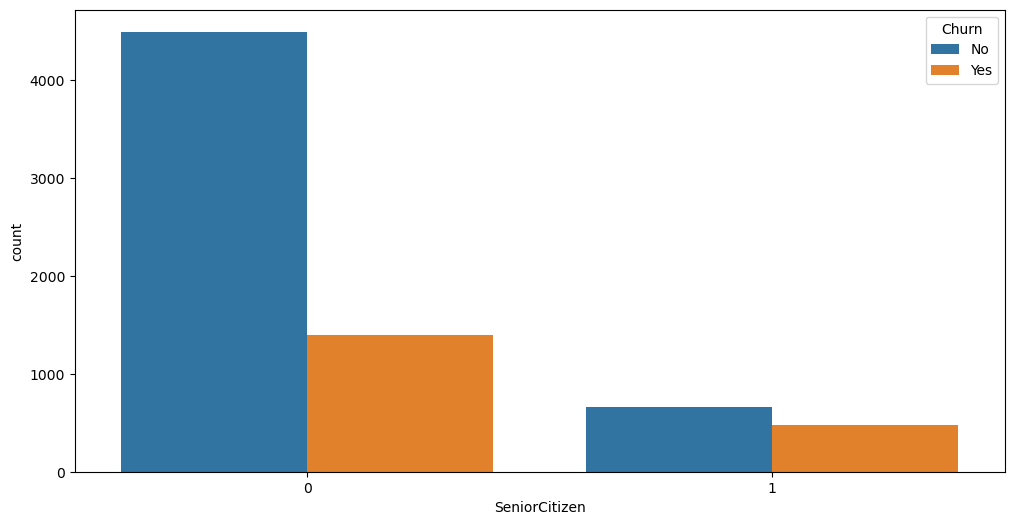

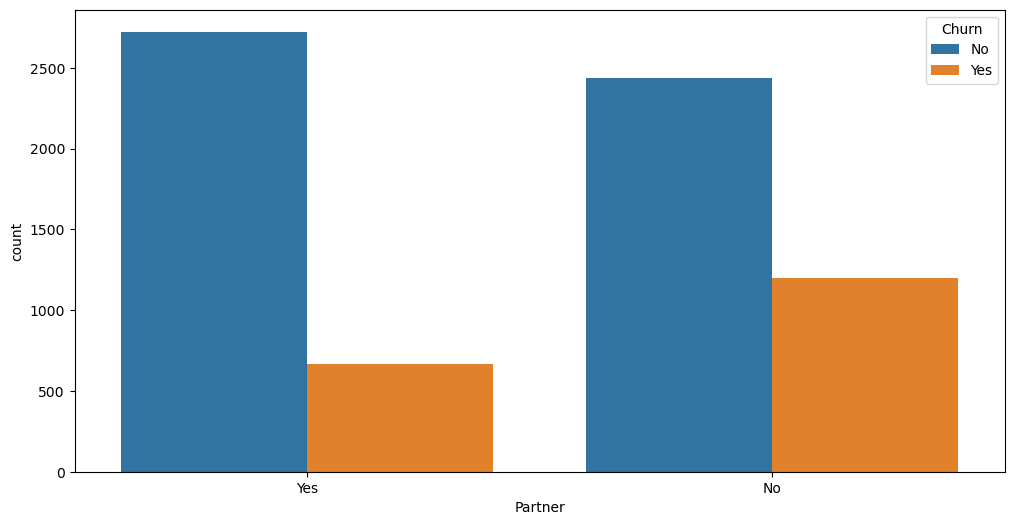

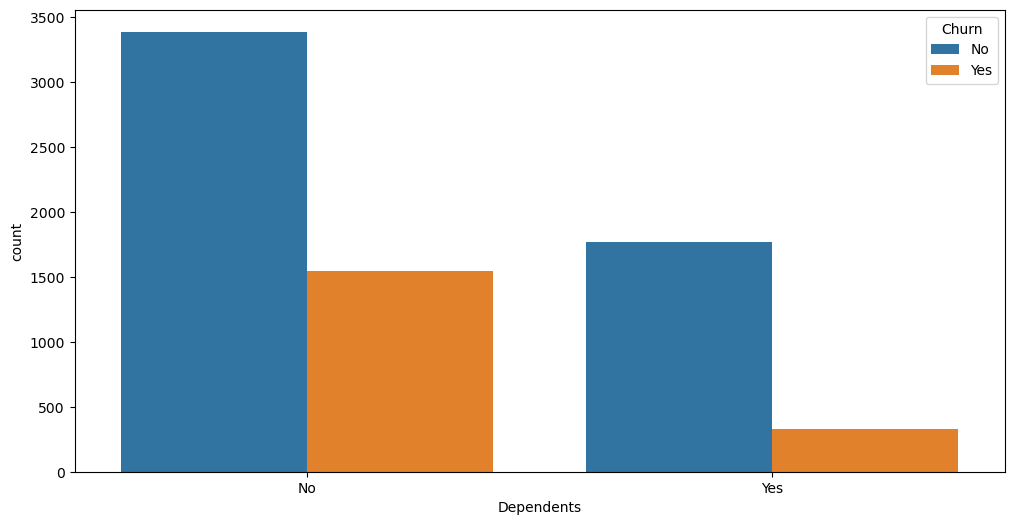

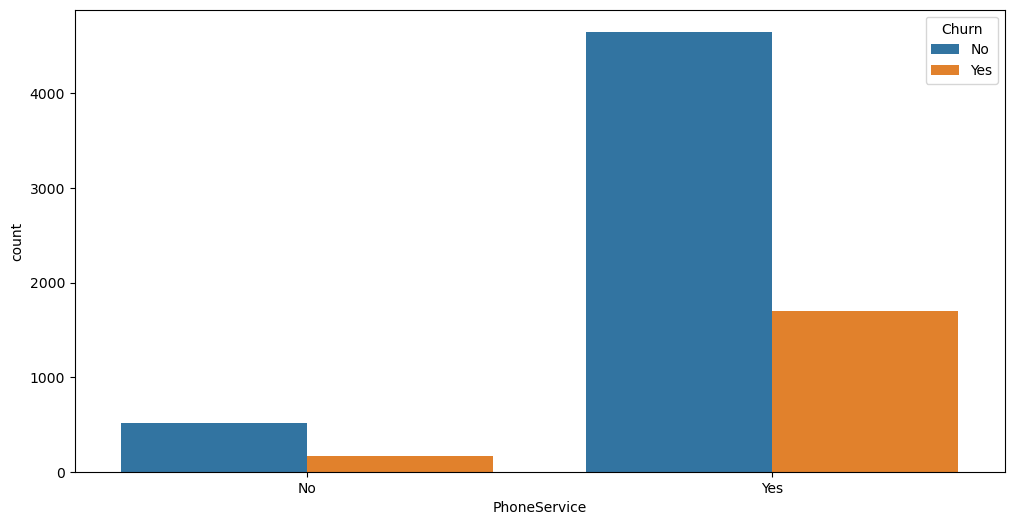

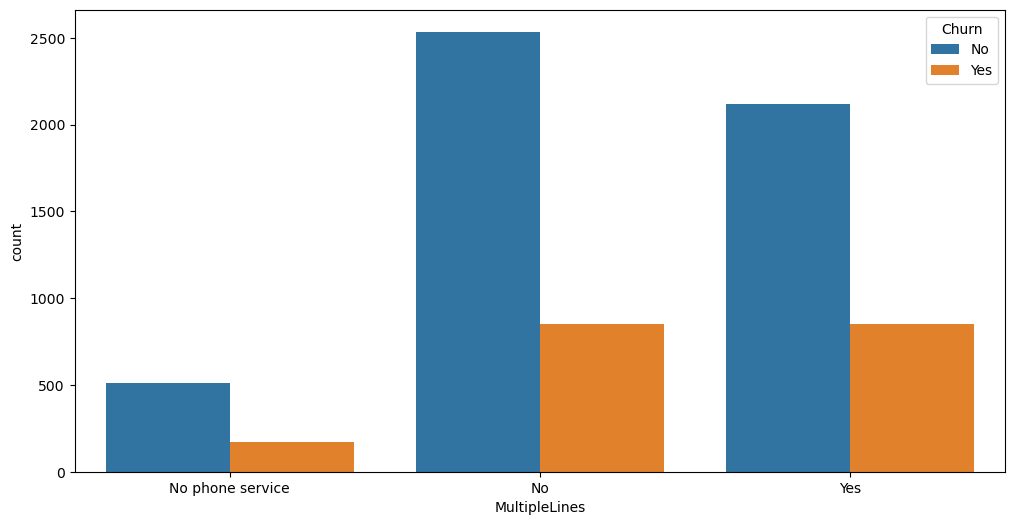

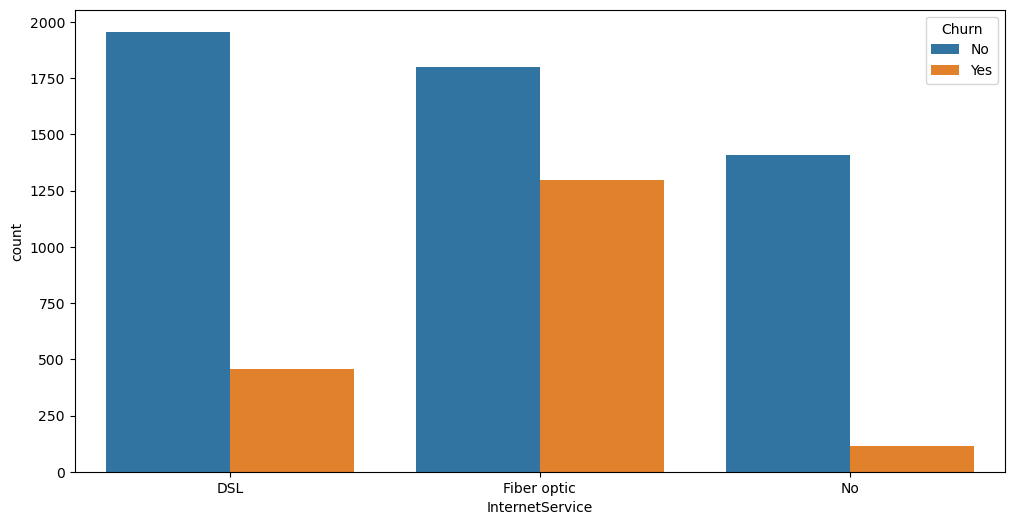

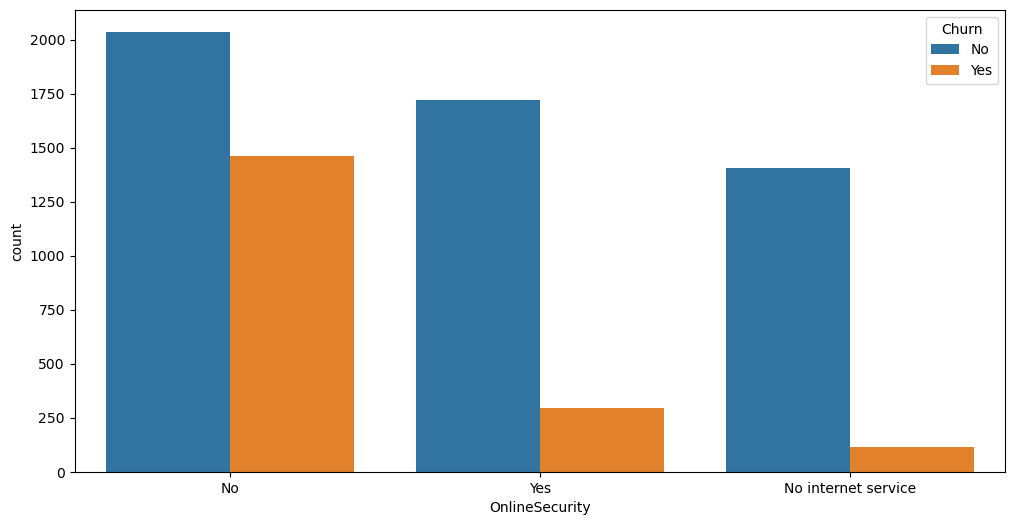

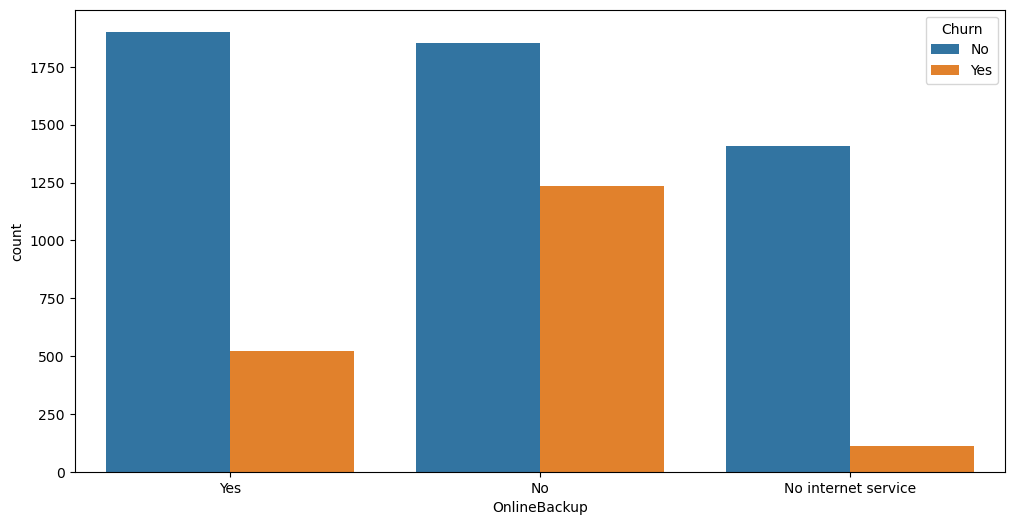

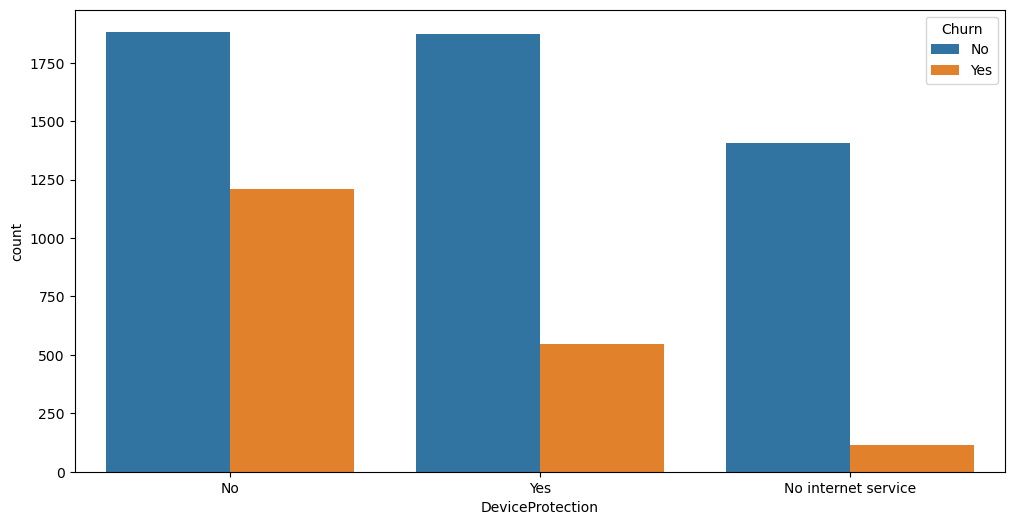

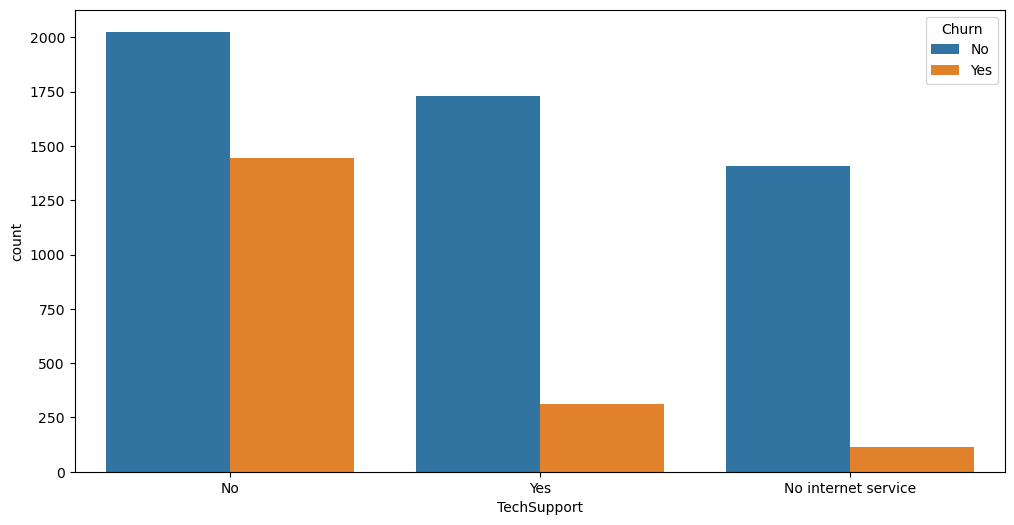

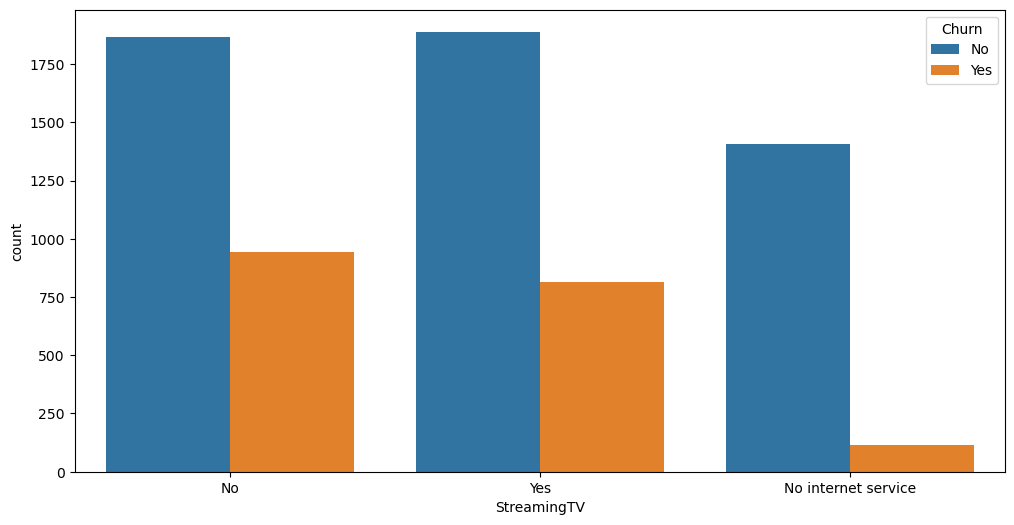

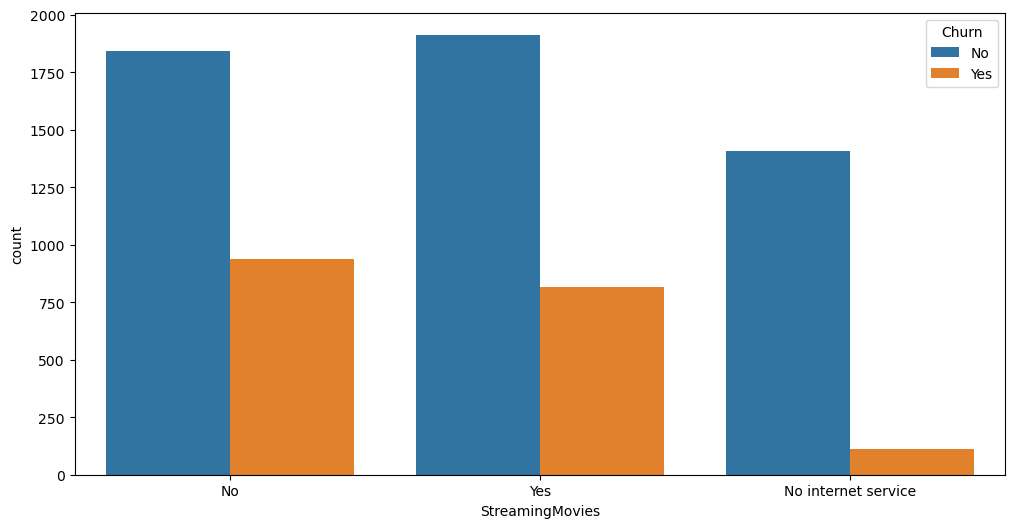

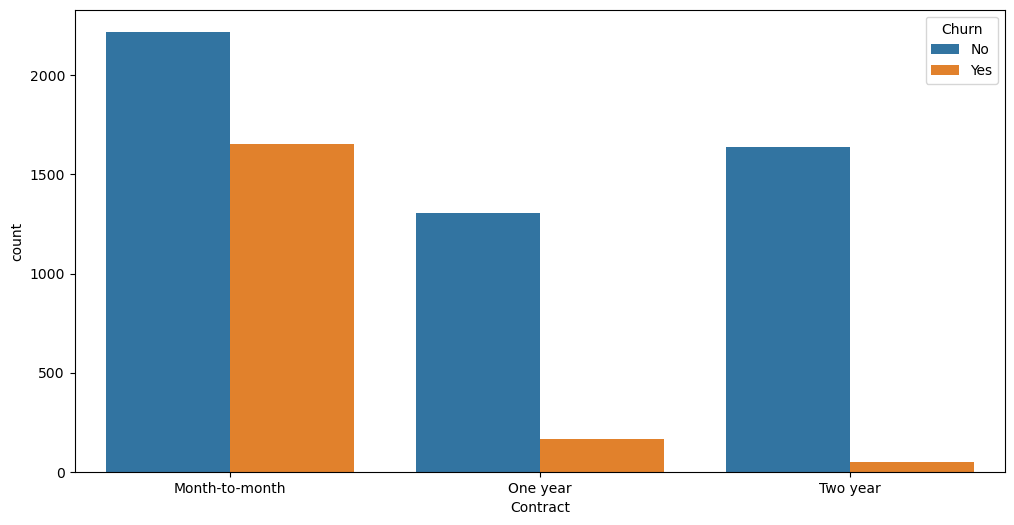

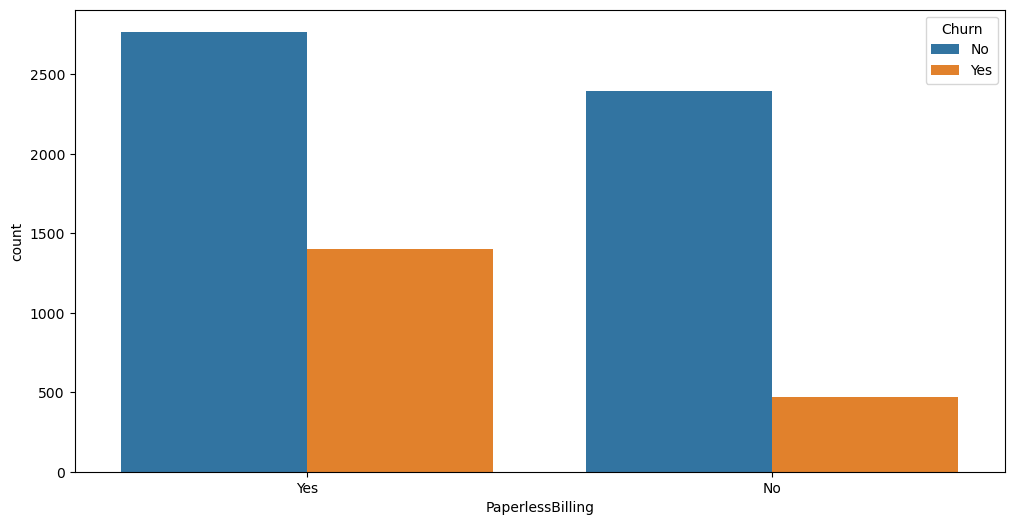

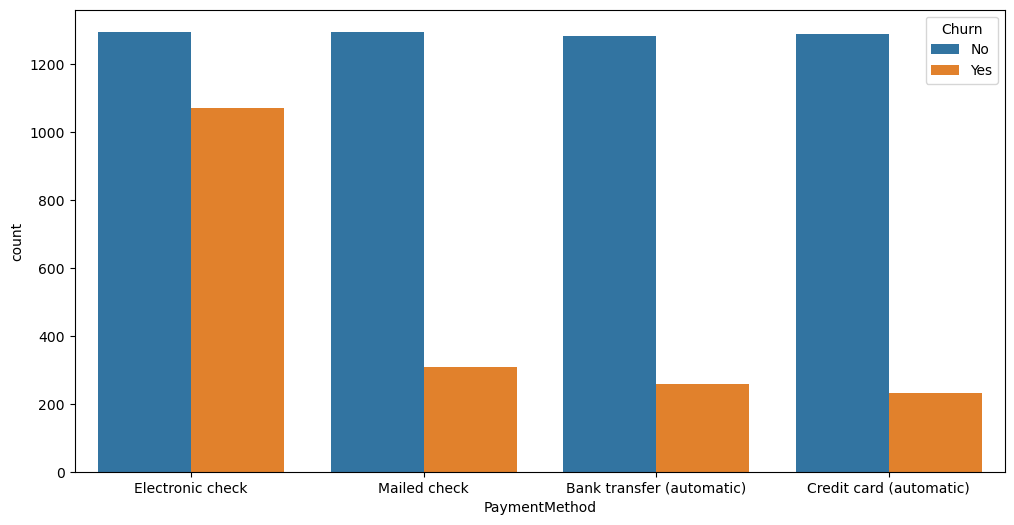

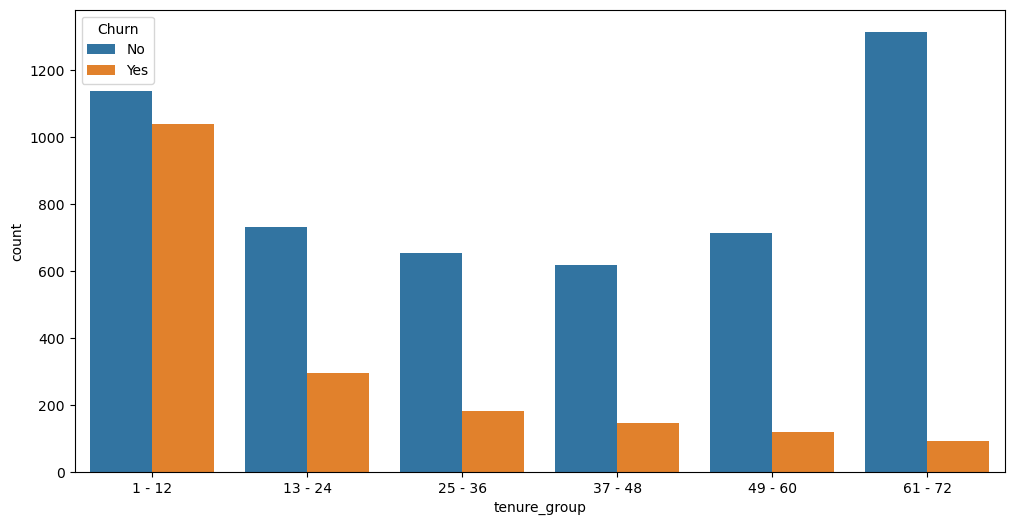

In [18]:
# Plot distibution of individual predictors by churn
for i ,predictor in enumerate(tel.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i,figsize = (12,6))
    sns.countplot(data= tel,x = predictor,hue = 'Churn')
    

In [19]:
#Converting the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0
tel['Churn'] = np.where(tel.Churn == 'Yes',1,0)

Convert all categorical variables into dummy variables

In [20]:
tel_dummies = pd.get_dummies(tel)
tel_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


#### Churn by Monthly Charges 

C:\Users\stuti\AppData\Local\Temp\ipykernel_6632\1900374743.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_dummies.MonthlyCharges[(tel_dummies["Churn"] == 0) ],
C:\Users\stuti\AppData\Local\Temp\ipykernel_6632\1900374743.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_dummies.MonthlyCharges[(tel_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

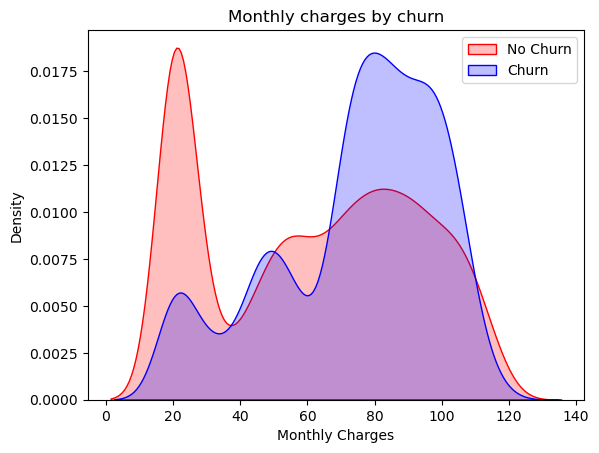

In [21]:
Mth = sns.kdeplot(tel_dummies.MonthlyCharges[(tel_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(tel_dummies.MonthlyCharges[(tel_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight - As the monthly charges increases the Churn increases


##### Churn by TotalCharges

C:\Users\stuti\AppData\Local\Temp\ipykernel_6632\3345103676.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(tel_dummies.TotalCharges[(tel_dummies["Churn"] == 0) ],
C:\Users\stuti\AppData\Local\Temp\ipykernel_6632\3345103676.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(tel_dummies.TotalCharges[(tel_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

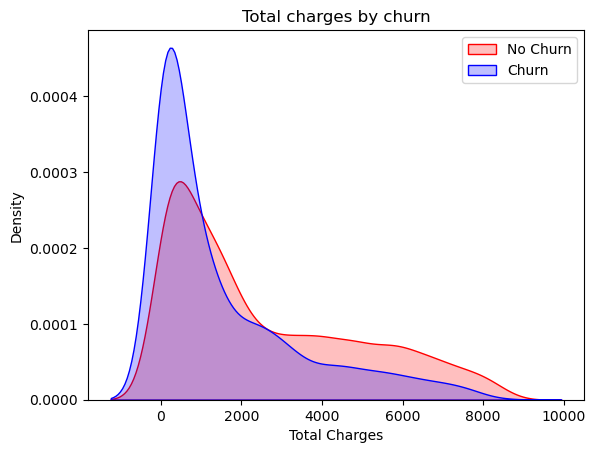

In [22]:
Tot = sns.kdeplot(tel_dummies.TotalCharges[(tel_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(tel_dummies.TotalCharges[(tel_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Insight - Churn is High even when total charges are low.
However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**

### Correlation of all the predictors with 'Churn'

<Axes: >

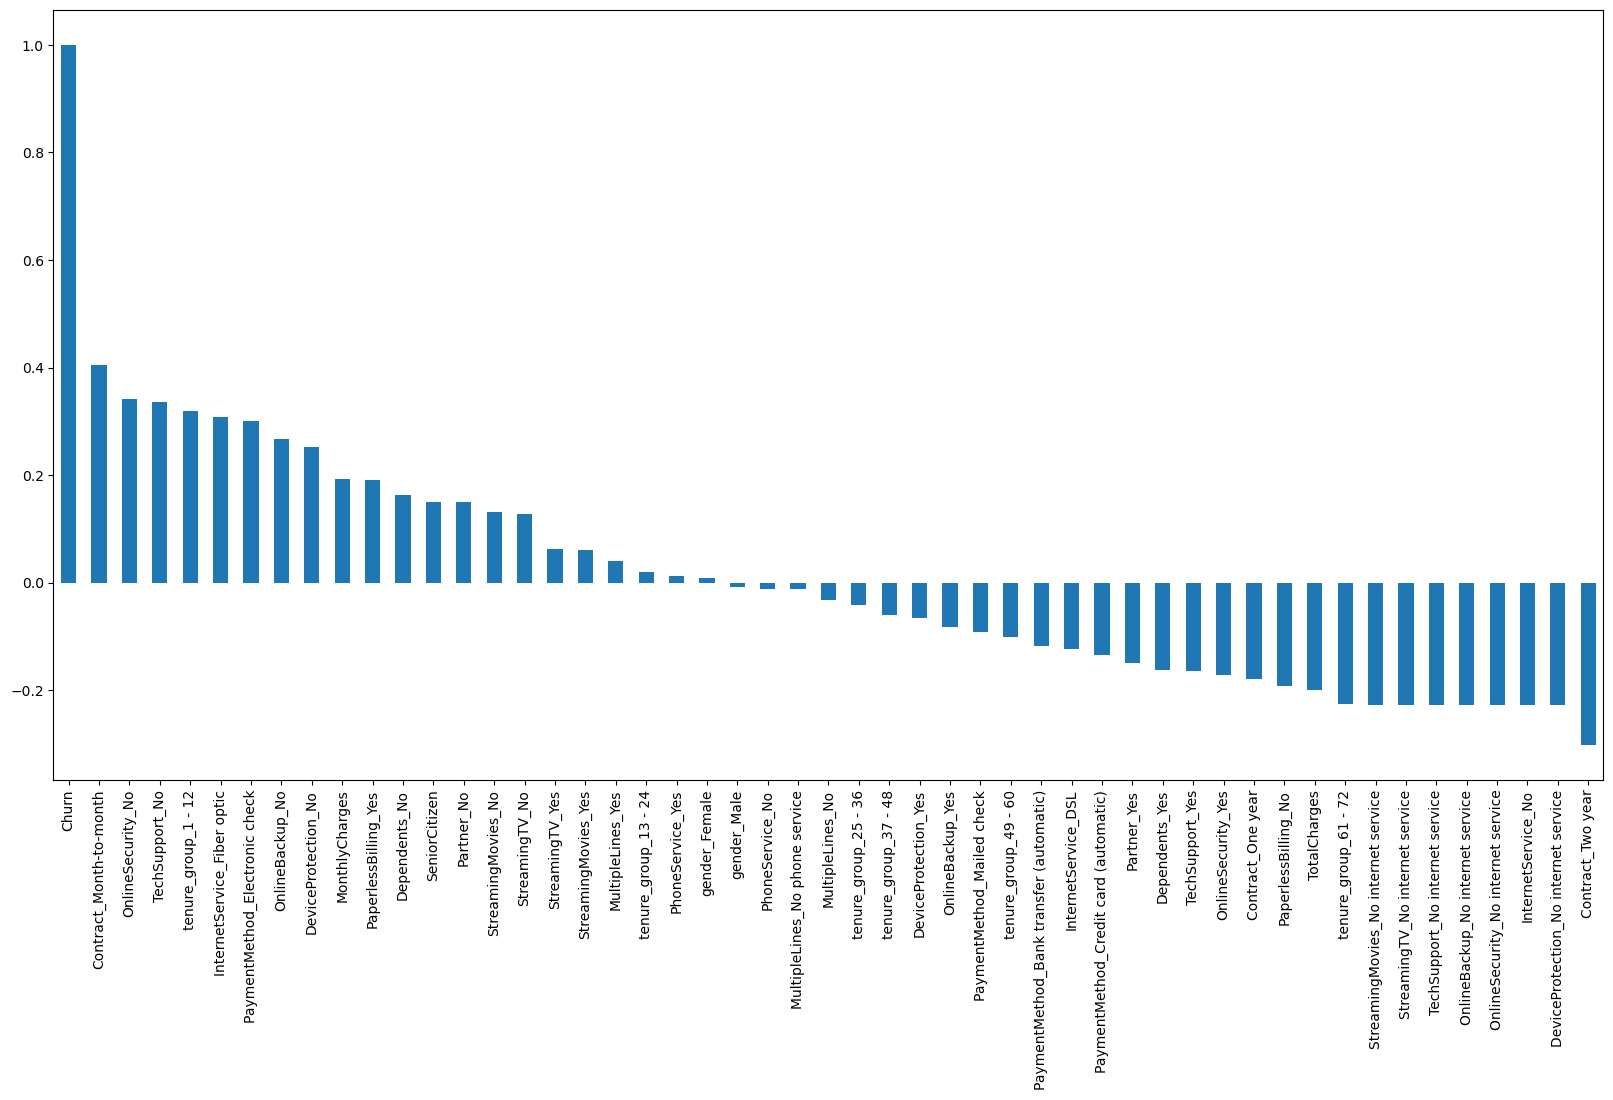

In [23]:
plt.figure(figsize=(20,10))
tel_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

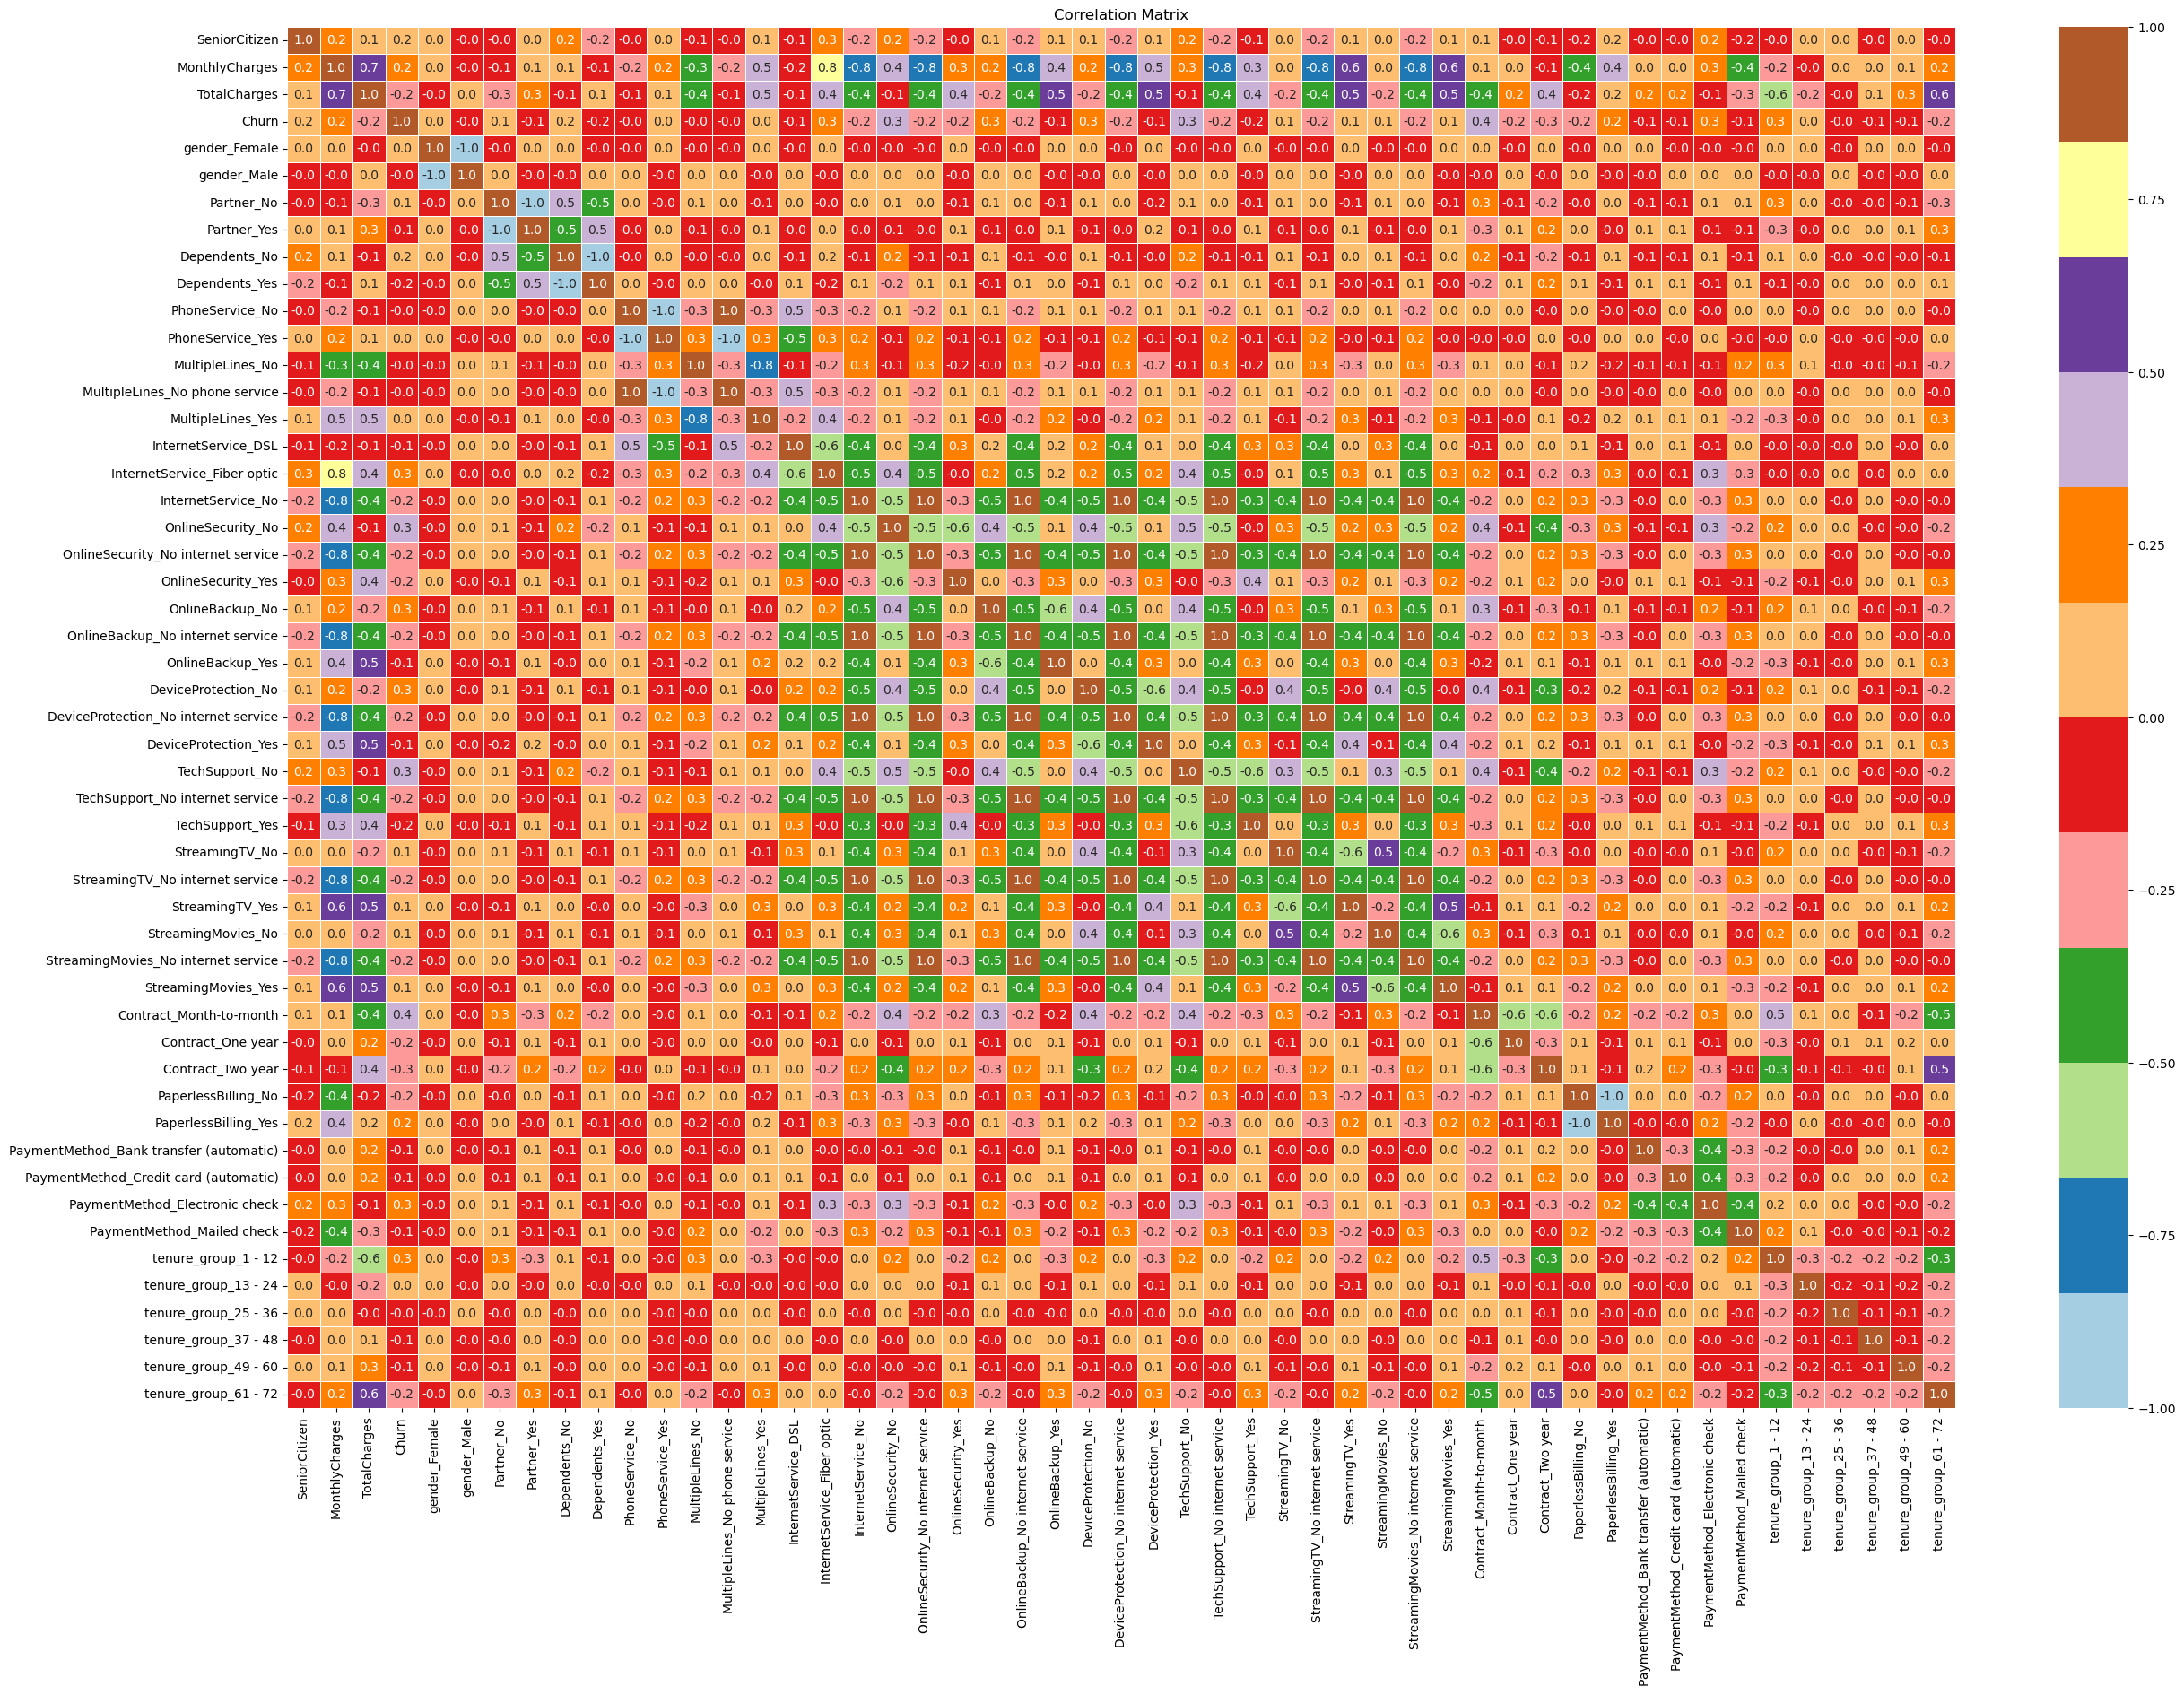

In [24]:
plt.figure(figsize=(30, 20))
sns.heatmap(tel_dummies.corr(), annot=True, cmap='Paired', fmt=".1f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Derived Insight: 

###### HIGH Churn seen in case of  Month to month contracts, No online security , No Tech support, First year of subscription and Fibre Optics Internet

###### LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

###### Factors like Gender, Availability of PhoneService have alomost NO impact on Churn



## Bivariate Analysis

In [25]:
new_df1_target0=tel.loc[tel["Churn"]==0]
new_df1_target1=tel.loc[tel["Churn"]==1]

In [26]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

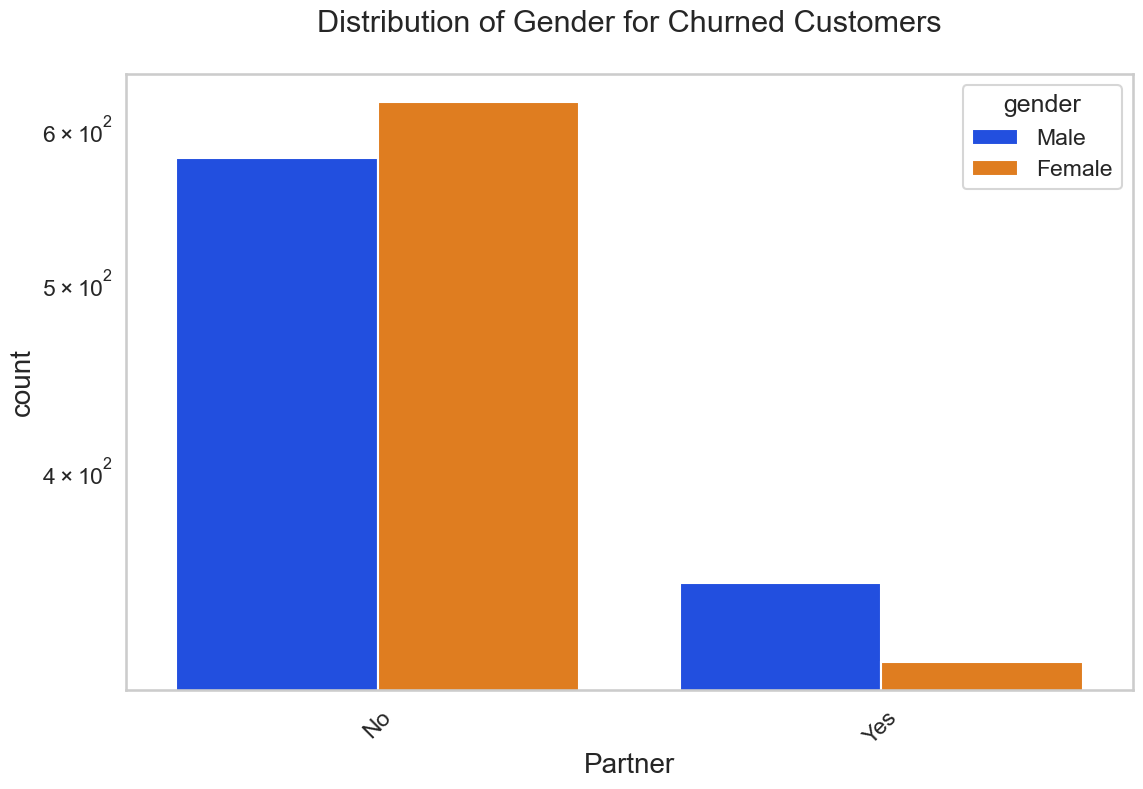

In [27]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

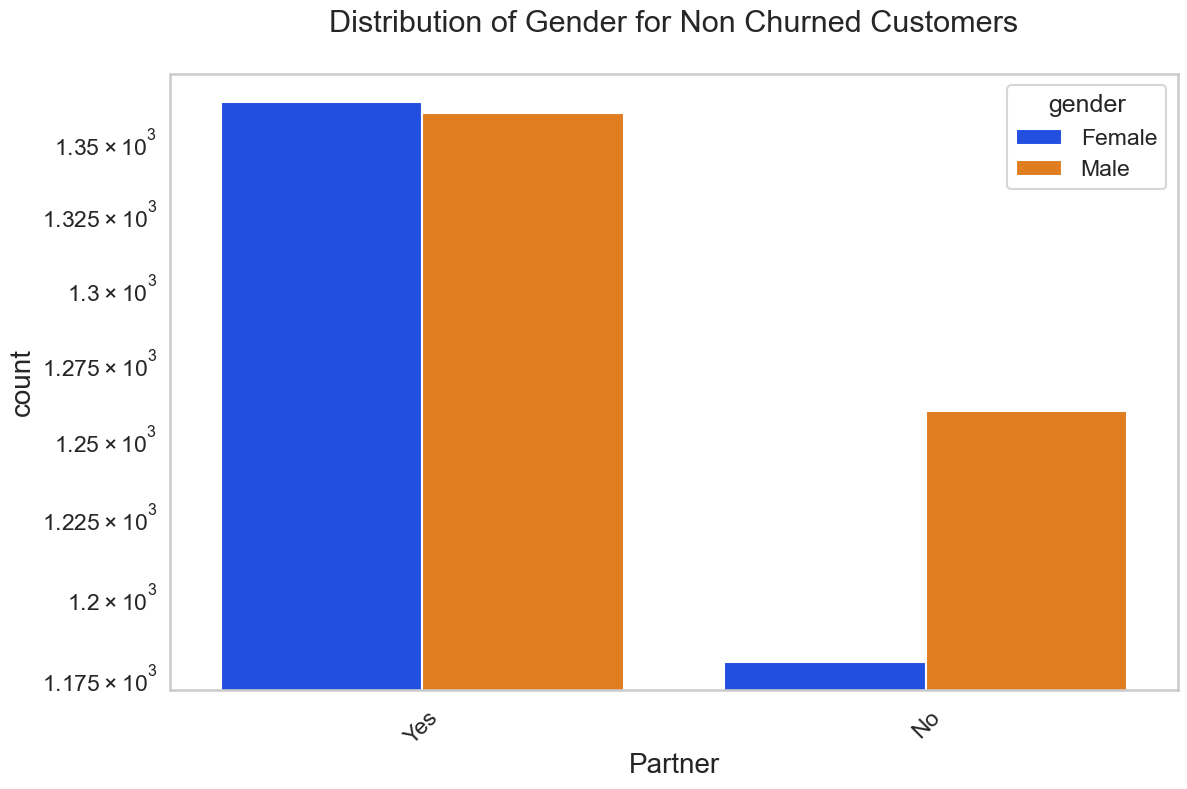

In [28]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

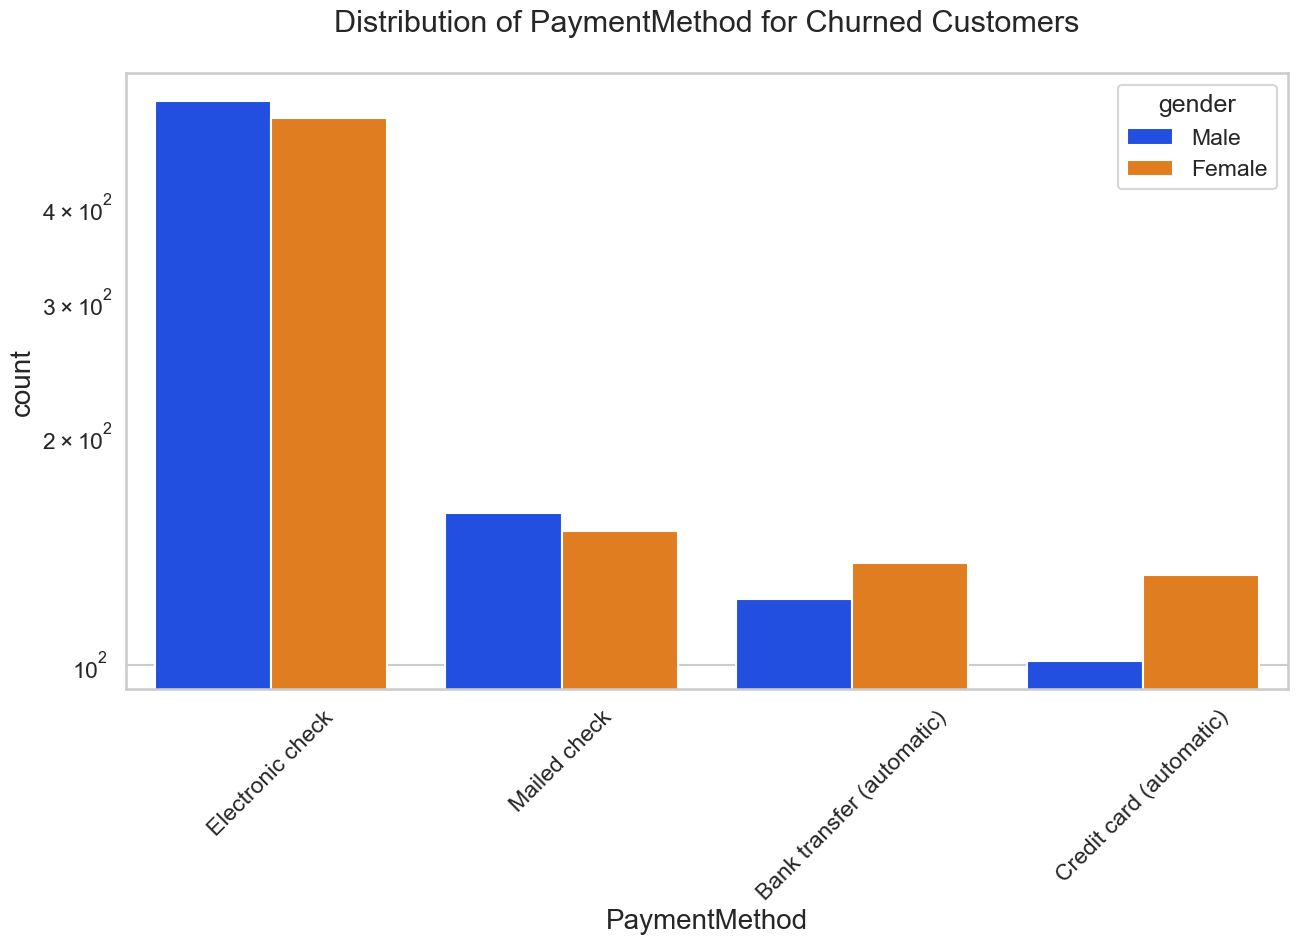

In [29]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

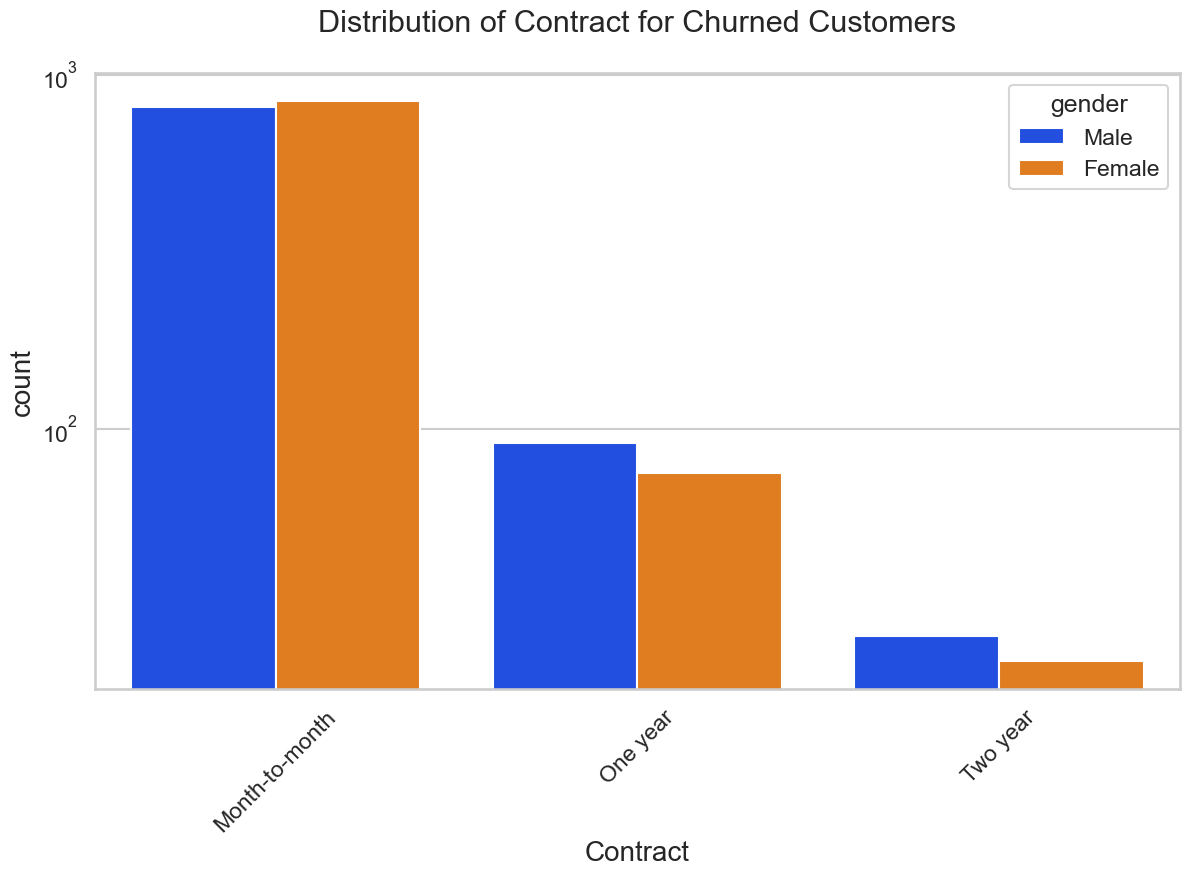

In [30]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

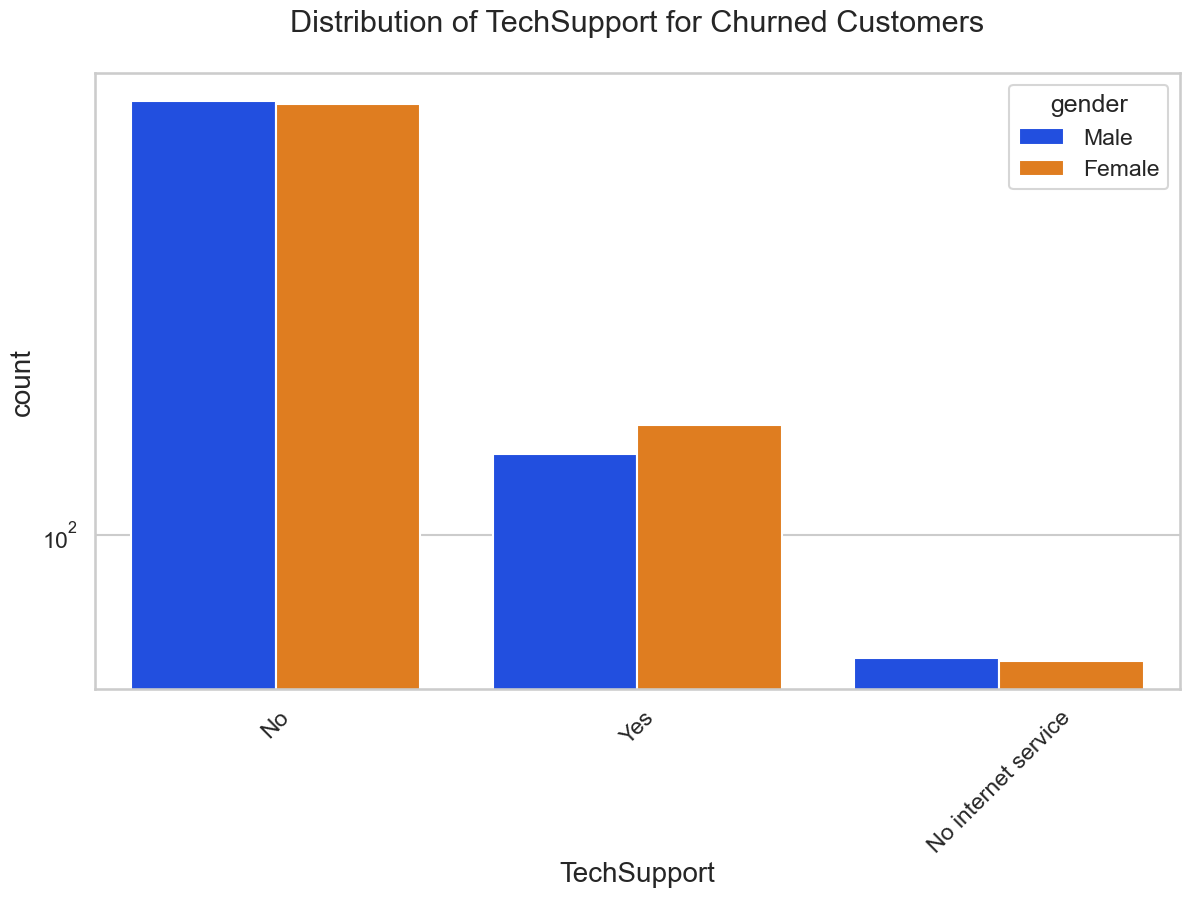

In [31]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

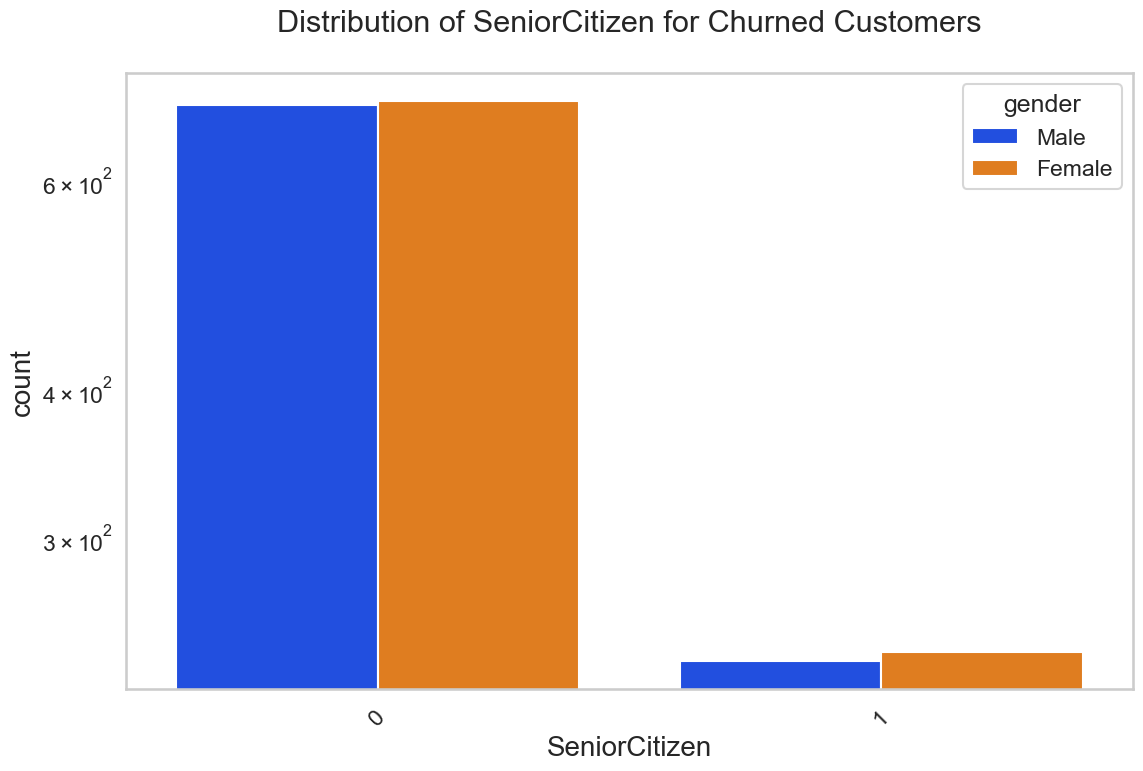

In [32]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

### EDA Conclustion 
1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

In [33]:
tel_dummies.to_csv('tel_new.csv')

# Predictive Model


In [34]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [35]:
df=pd.read_csv("tel_new.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [36]:
df=df.drop('Unnamed: 0',axis=1)

In [37]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [38]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

### Train Test Split 

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Decision Tree Classifier

In [40]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [41]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [42]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
model_dt.score(x_test,y_test)

0.7818052594171997

In [44]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1060
           1       0.56      0.55      0.55       347

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.78      0.78      0.78      1407



In [45]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred)*100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred)*100)

Accuracy: 78.18052594171996
Precision: 55.84795321637427
Recall: 55.04322766570605
F1 Score: 55.442670537010166


###### As the accuracy is quite low, and because it is imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

### Hence,we use SMOTEENN (UpSampling + ENN)

In [46]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [47]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [48]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [49]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9314720812182741
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       497
           1       0.92      0.96      0.94       685

    accuracy                           0.93      1182
   macro avg       0.93      0.93      0.93      1182
weighted avg       0.93      0.93      0.93      1182



### Evaluating the model again based on the upscaled data 

In [50]:
# Evaluate the model
print("Accuracy:", accuracy_score(yr_test, yr_predict)*100)
print("Precision:", precision_score(yr_test, yr_predict)*100)
print("Recall:", recall_score(yr_test, yr_predict)*100)
print("F1 Score:", f1_score(yr_test, yr_predict)*100)

Accuracy: 93.1472081218274
Precision: 92.17877094972067
Recall: 96.35036496350365
F1 Score: 94.2184154175589


In [51]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[441  56]
 [ 25 660]]


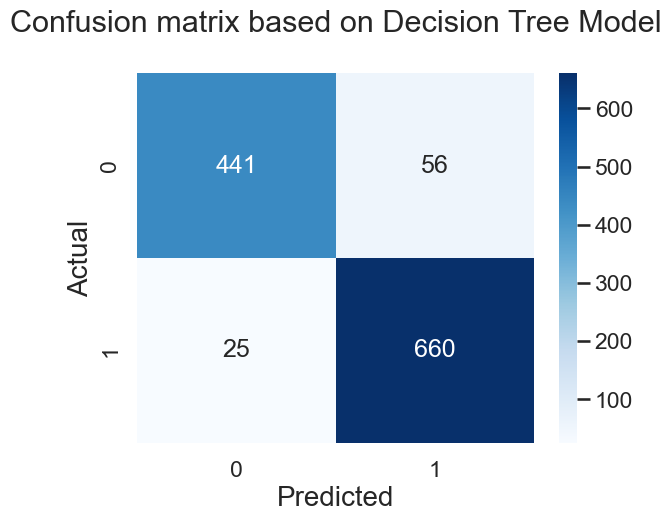

In [52]:
conf_matrix = confusion_matrix(yr_test, yr_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix based on Decision Tree Model')
plt.show()

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [55]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [56]:
y_pred=model_rf.predict(x_test)

In [57]:
model_rf.score(x_test,y_test)

0.8123667377398721

In [58]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1060
           1       0.66      0.50      0.57       347

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



### Using SMOTEENN (UpSampling + ENN)

In [59]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [60]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [61]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [62]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [63]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [64]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [65]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9277824978759558
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       538
           1       0.91      0.96      0.94       639

    accuracy                           0.93      1177
   macro avg       0.93      0.92      0.93      1177
weighted avg       0.93      0.93      0.93      1177



### Evaluating the model again based on the upscaled data 

In [66]:
# Evaluate the model
print("Accuracy:", accuracy_score(yr_test1, yr_predict1)*100)
print("Precision:", precision_score(yr_test1, yr_predict1)*100)
print("Recall:", recall_score(yr_test1, yr_predict1)*100)
print("F1 Score:", f1_score(yr_test1, yr_predict1)*100)

Accuracy: 92.77824978759558
Precision: 90.97633136094674
Recall: 96.24413145539906
F1 Score: 93.5361216730038


In [67]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[477  61]
 [ 24 615]]


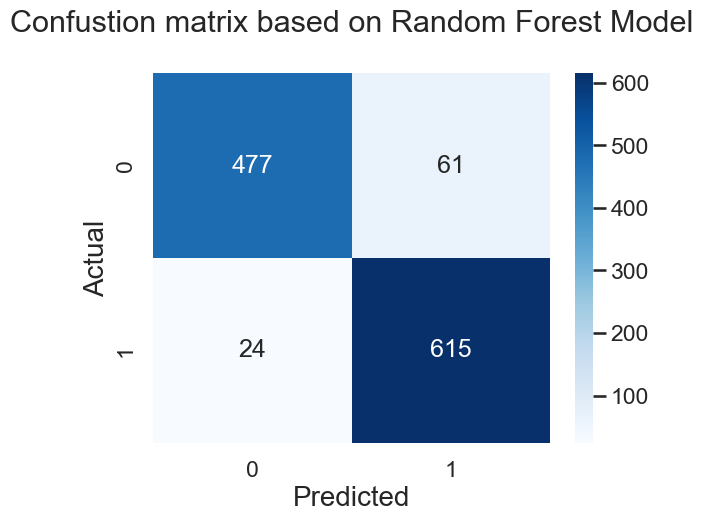

In [68]:
conf_matrix = confusion_matrix(yr_test1, yr_predict1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion matrix based on Random Forest Model')
plt.show()

## XgBoost


In [69]:
my_model = XGBClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
my_model.fit(x_train,y_train)

D:\Anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:31:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, min_samples_leaf=8, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [70]:
predictions = my_model.predict(x_test)

In [71]:
my_model.score(x_test,y_test)

0.7931769722814499

In [83]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1060
           1       0.56      0.55      0.55       347

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.78      0.78      0.78      1407



### Using SMOTEENN (UpSampling + ENN)

In [72]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(x,y)

In [73]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2, y_resampled2,test_size=0.2)

In [75]:
my_model_smote = XGBClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [77]:
my_model_smote.fit(xr_train2,yr_train2)

D:\Anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, min_samples_leaf=8, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [78]:
yr_predict2 = my_model_smote.predict(xr_test2)

In [79]:
model_score_r2 = model_rf_smote.score(xr_test2, yr_test2)


In [80]:
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))

0.9249146757679181
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       529
           1       0.96      0.96      0.96       643

    accuracy                           0.95      1172
   macro avg       0.95      0.95      0.95      1172
weighted avg       0.95      0.95      0.95      1172



### Evaluating the model again based on the upscaled data 

In [84]:
# Evaluate the model
print("Accuracy:", accuracy_score(yr_test2, yr_predict2)*100)
print("Precision:", precision_score(yr_test2, yr_predict2)*100)
print("Recall:", recall_score(yr_test2, yr_predict2)*100)
print("F1 Score:", f1_score(yr_test2, yr_predict2)*100)

Accuracy: 95.39249146757679
Precision: 95.65891472868216
Recall: 95.95645412130638
F1 Score: 95.80745341614907


In [85]:
print(metrics.confusion_matrix(yr_test2, yr_predict2))

[[501  28]
 [ 26 617]]


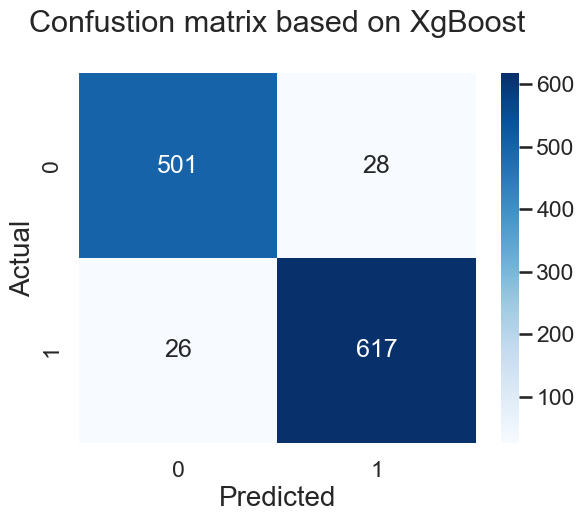

In [87]:
conf_matrix = confusion_matrix(yr_test2, yr_predict2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion matrix based on XgBoost')
plt.show()

## Logistic Regression

In [93]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
logreg_score = logreg.score(x_test, y_test)
print(logreg_score)
print(classification_report(y_test, y_pred))


0.8166311300639659
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1060
           1       0.66      0.53      0.59       347

    accuracy                           0.82      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407



D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Using SMOTEENN (UpSampling + ENN)

In [94]:
sm = SMOTEENN()
X_resampled3, y_resampled3 = sm.fit_resample(x,y)

In [95]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled3, y_resampled3,test_size=0.2)

In [98]:
logreg_smote = LogisticRegression()


In [99]:
logreg_smote.fit(xr_train3,yr_train3)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
yr_predict3 = my_model_smote.predict(xr_test3)

In [101]:
model_score_r3 = model_rf_smote.score(xr_test3, yr_test3)

In [102]:
print(model_score_r3)
print(metrics.classification_report(yr_test3, yr_predict3))

0.9363327674023769
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       509
           1       0.98      0.98      0.98       669

    accuracy                           0.98      1178
   macro avg       0.98      0.98      0.98      1178
weighted avg       0.98      0.98      0.98      1178



### Evaluating the model again based on the upscaled data 

In [103]:
# Evaluate the model
print("Accuracy:", accuracy_score(yr_test3, yr_predict3)*100)
print("Precision:", precision_score(yr_test3, yr_predict3)*100)
print("Recall:", recall_score(yr_test3, yr_predict3)*100)
print("F1 Score:", f1_score(yr_test3, yr_predict3)*100)

Accuracy: 97.70797962648557
Precision: 98.05389221556887
Recall: 97.90732436472346
F1 Score: 97.98055347793569


In [104]:
print(metrics.confusion_matrix(yr_test3, yr_predict3))

[[496  13]
 [ 14 655]]


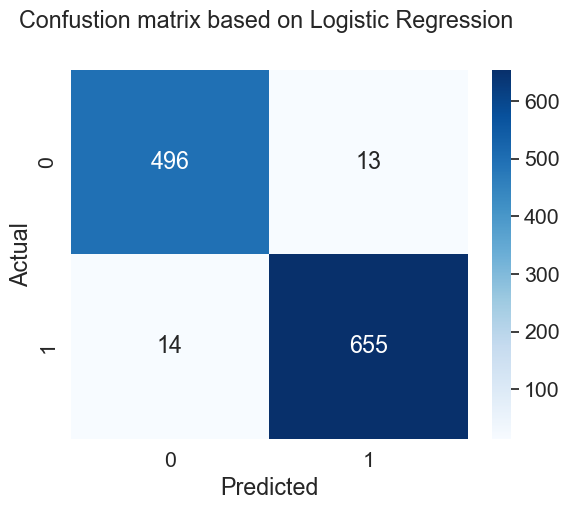

In [112]:
conf_matrix = confusion_matrix(yr_test3, yr_predict3)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion matrix based on Logistic Regression ')
plt.show()

# Comparision of Accuracy between the 4 models ,based on the actual data provided

In [111]:
model = {'RandomForest' : RandomForestClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8),
        'Logistic Regression' : LogisticRegression(),
         'XGBoost' : XGBClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8),
         'Decision Tree': DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
        }
result={}
print("The accuracy of each model\n")
for key,value in model.items():
  model = value
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  result[key]=format(100*accuracy)
  print('{}: {}'.format(key, accuracy_score(y_test, y_pred)))

The accuracy of each model

RandomForest: 0.8123667377398721
Logistic Regression: 0.8166311300639659
XGBoost: 0.7931769722814499
Decision Tree: 0.7818052594171997


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


In [89]:
base_model = pd.DataFrame(result.items(), columns=['Model', 'Accuracy'])
base_model = base_model.sort_values('Accuracy', ascending=False).reset_index(drop=True)
base_model

,Model,Accuracy
0,Logistic Regression,0.816631
1,RandomForest,0.812367
2,XGBoost,0.793177
3,Decision Tree,0.781805


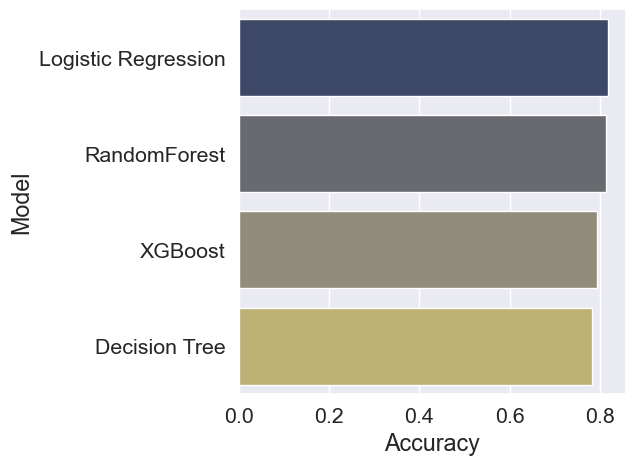

In [115]:
plt.figure(figsize=(5,5))
ax=sns.barplot(y='Model', x='Accuracy', data=base_model, palette='cividis')
plt.show()